# Morgan Stanley


In [216]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ARDL

sns.set()
import warnings
warnings.filterwarnings("ignore")


In [217]:
date = pd.date_range(start = '2007-12-01',end= '2022-12-01',freq = 'Q')


In [218]:
date

DatetimeIndex(['2007-12-31', '2008-03-31', '2008-06-30', '2008-09-30',
               '2008-12-31', '2009-03-31', '2009-06-30', '2009-09-30',
               '2009-12-31', '2010-03-31', '2010-06-30', '2010-09-30',
               '2010-12-31', '2011-03-31', '2011-06-30', '2011-09-30',
               '2011-12-31', '2012-03-31', '2012-06-30', '2012-09-30',
               '2012-12-31', '2013-03-31', '2013-06-30', '2013-09-30',
               '2013-12-31', '2014-03-31', '2014-06-30', '2014-09-30',
               '2014-12-31', '2015-03-31', '2015-06-30', '2015-09-30',
               '2015-12-31', '2016-03-31', '2016-06-30', '2016-09-30',
               '2016-12-31', '2017-03-31', '2017-06-30', '2017-09-30',
               '2017-12-31', '2018-03-31', '2018-06-30', '2018-09-30',
               '2018-12-31', '2019-03-31', '2019-06-30', '2019-09-30',
               '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30',
               '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30',
      

In [219]:
date = date.to_period('Y')
date

PeriodIndex(['2007', '2008', '2008', '2008', '2008', '2009', '2009', '2009',
             '2009', '2010', '2010', '2010', '2010', '2011', '2011', '2011',
             '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013',
             '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015',
             '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017',
             '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019',
             '2019', '2020', '2020', '2020', '2020', '2021', '2021', '2021',
             '2021', '2022', '2022', '2022'],
            dtype='period[A-DEC]', freq='A-DEC')

In [220]:
#we genrated a series of data starting from 2007  till 2022 on a yearly basis

In [221]:
MS_data = pd.read_excel('MS_Data Analyses_v1.xlsx',sheet_name='Test_Results')

#pulled the MS data

In [222]:
MS_data.columns

Index(['Date', 'MS_EQUITY($ M)', 'SPX', 'Trading volume (shares US market)',
       'MS 6M Spread', 'MS 1Yr Spread', 'MS 2Yr Spread'],
      dtype='object')

In [223]:
MS_data.head()

,Date,MS_EQUITY($ M),SPX,Trading volume (shares US market),MS 6M Spread,MS 1Yr Spread,MS 2Yr Spread
0,Q4 2007,2472,1477.184342,1027273155,1769.31,1620.46,1356.91
1,Q1 2008,3414,1220.042056,1797537680,1769.31,1620.46,1356.91
2,Q2 2008,2228,1220.042056,1708720980,1769.31,1620.46,1356.91
3,Q3 2008,6031,1220.042056,2382291883,1769.31,1620.46,1356.91
4,Q4 2008,-2648,1220.042056,2748365910,650.00,660.00,540.00


In [224]:
MS_data['index'] = MS_data['Date']

In [225]:
MS_data.set_index("index",inplace =True)

In [226]:
#we club the yearly data with the MS data

In [227]:
MS_data.head()

,Date,MS_EQUITY($ M),SPX,Trading volume (shares US market),MS 6M Spread,MS 1Yr Spread,MS 2Yr Spread
index,,,,,,,
Q4 2007,Q4 2007,2472,1477.184342,1027273155,1769.31,1620.46,1356.91
Q1 2008,Q1 2008,3414,1220.042056,1797537680,1769.31,1620.46,1356.91
Q2 2008,Q2 2008,2228,1220.042056,1708720980,1769.31,1620.46,1356.91
Q3 2008,Q3 2008,6031,1220.042056,2382291883,1769.31,1620.46,1356.91
Q4 2008,Q4 2008,-2648,1220.042056,2748365910,650.00,660.00,540.00


In [228]:
MS_data.drop(columns="Date", inplace = True)


In [229]:
MS_data.head()

,MS_EQUITY($ M),SPX,Trading volume (shares US market),MS 6M Spread,MS 1Yr Spread,MS 2Yr Spread
index,,,,,,
Q4 2007,2472,1477.184342,1027273155,1769.31,1620.46,1356.91
Q1 2008,3414,1220.042056,1797537680,1769.31,1620.46,1356.91
Q2 2008,2228,1220.042056,1708720980,1769.31,1620.46,1356.91
Q3 2008,6031,1220.042056,2382291883,1769.31,1620.46,1356.91
Q4 2008,-2648,1220.042056,2748365910,650.00,660.00,540.00


In [230]:
type(MS_data.index)
# we ensured that the index of our data is a  period index since we would be testing the data for 
#stationarity and cointegration, it is important for the data to a time series data.

pandas.core.indexes.base.Index

## Test for stationarity

### Augmented Dickey Fuller Test

In [231]:
def ADF(series,title=''):
    print(f'The Augmented Dickey Fuller Test: {title}')

    result = adfuller(series,autolag='AIC') # Augmented Dickey Fuller test is a statistical test to check for stationarity. 
    
    labels = ['ADF test Statistic',"p-value","lags used","observations"]
    out = pd.Series(result[0:4],index = labels)
    
    for key,val in result[4].items():
        out[f'the critical value ({key})'] = val
    print(out.to_string())
    
    if result[1]<=0.05:
       
        print("Reject the null hypothesis")
        print(f'The {title} series is stationary')
    if result[1]>0.05:
        print("Accept the null hypothesis")
        print(f'The {title } series is non-stationary ')
        


In [232]:
ADF(MS_data['MS_EQUITY($ M)'],'MS_EQUITY($ M)')

The Augmented Dickey Fuller Test: MS_EQUITY($ M)
ADF test Statistic           0.739501
p-value                      0.990594
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Accept the null hypothesis
The MS_EQUITY($ M) series is non-stationary 


In [233]:
ADF(MS_data['SPX'],'SPX')

The Augmented Dickey Fuller Test: SPX
ADF test Statistic           2.191081
p-value                      0.998875
lags used                    7.000000
observations                52.000000
the critical value (1%)     -3.562879
the critical value (5%)     -2.918973
the critical value (10%)    -2.597393
Accept the null hypothesis
The SPX series is non-stationary 


In [234]:
ADF(MS_data['Trading volume (shares US market)'],'Trading volume (shares US market)')

The Augmented Dickey Fuller Test: Trading volume (shares US market)
ADF test Statistic           0.420424
p-value                      0.982243
lags used                    2.000000
observations                57.000000
the critical value (1%)     -3.550670
the critical value (5%)     -2.913766
the critical value (10%)    -2.594624
Accept the null hypothesis
The Trading volume (shares US market) series is non-stationary 


In [235]:
ADF(MS_data['MS 6M Spread'],'MS 6M Spread')

The Augmented Dickey Fuller Test: MS 6M Spread
ADF test Statistic          -5.485124
p-value                      0.000002
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Reject the null hypothesis
The MS 6M Spread series is stationary


In [236]:
ADF(MS_data['MS 1Yr Spread'],'MS 1Yr Spread')

The Augmented Dickey Fuller Test: MS 1Yr Spread
ADF test Statistic          -4.477551
p-value                      0.000216
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Reject the null hypothesis
The MS 1Yr Spread series is stationary


In [237]:
ADF(MS_data['MS 2Yr Spread'],'MS 2Yr Spread')

The Augmented Dickey Fuller Test: MS 2Yr Spread
ADF test Statistic          -3.826063
p-value                      0.002652
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Reject the null hypothesis
The MS 2Yr Spread series is stationary


## Test for Cointegration

In [238]:
import statsmodels.tsa.stattools as ts

### Johansen Test

In [239]:
def cointegration_test(data1,data2,title =''):
    print(f'The Johansen cointegration test for {title} is: ')
    result = ts.coint(data1,data2,autolag='aic')#Johansen test is used to check cointegration 
    result
    labels = ["t -statistic","#p value"]
    out = pd.Series(result[0:2],index= labels)
    
    for key,val in dict(zip(['1%','2%','3%'],result[2])).items():
        out[f' the critical value {(key)} is : '] = val
       
   
    
    print(out.to_string())
    print("\n")
    if result[1]<=0.05:
        
        
        print("Reject the Null hypothesis")
        print("The series are cointegrated  ")
        print("\n")
        
    if result[1]>0.05:
        
       
        print("We Accept the Null hypothesis")
        print("There is no cointegration between the series ")
        print("\n")
   

In [240]:
cointegration_test(MS_data['MS_EQUITY($ M)'],MS_data['SPX'],'MS_EQUITY vs SPX')

The Johansen cointegration test for MS_EQUITY vs SPX is: 
t -statistic                   -1.470726
#p value                        0.772245
 the critical value 1% is :    -4.091697
 the critical value 2% is :    -3.441651
 the critical value 3% is :    -3.117116


We Accept the Null hypothesis
There is no cointegration between the series 




In [241]:
cointegration_test(MS_data['MS_EQUITY($ M)'],MS_data['Trading volume (shares US market)'],'MS_EQUITY vs Trading volume (shares US market)')

The Johansen cointegration test for MS_EQUITY vs Trading volume (shares US market) is: 
t -statistic                   -1.741471
#p value                        0.657691
 the critical value 1% is :    -4.091697
 the critical value 2% is :    -3.441651
 the critical value 3% is :    -3.117116


We Accept the Null hypothesis
There is no cointegration between the series 




In [242]:
cointegration_test(MS_data['MS_EQUITY($ M)'],MS_data['MS 6M Spread'],'MS_EQUITY vs MS 6M Spread')

The Johansen cointegration test for MS_EQUITY vs MS 6M Spread is: 
t -statistic                    0.052015
#p value                        0.987038
 the critical value 1% is :    -4.091697
 the critical value 2% is :    -3.441651
 the critical value 3% is :    -3.117116


We Accept the Null hypothesis
There is no cointegration between the series 




In [243]:
cointegration_test(MS_data['MS_EQUITY($ M)'],MS_data['MS 1Yr Spread'],'MS_EQUITY vs MS 1Yr Spread')

The Johansen cointegration test for MS_EQUITY vs MS 1Yr Spread is: 
t -statistic                    0.053881
#p value                        0.987077
 the critical value 1% is :    -4.091697
 the critical value 2% is :    -3.441651
 the critical value 3% is :    -3.117116


We Accept the Null hypothesis
There is no cointegration between the series 




In [244]:
cointegration_test(MS_data['MS_EQUITY($ M)'],MS_data['MS 2Yr Spread'],'MS_EQUITY vs MS 2Yr Spread')

The Johansen cointegration test for MS_EQUITY vs MS 2Yr Spread is: 
t -statistic                    0.036387
#p value                        0.986711
 the critical value 1% is :    -4.091697
 the critical value 2% is :    -3.441651
 the critical value 3% is :    -3.117116


We Accept the Null hypothesis
There is no cointegration between the series 




## Linear Regression


In [245]:
MS_data.columns

Index(['MS_EQUITY($ M)', 'SPX', 'Trading volume (shares US market)',
       'MS 6M Spread', 'MS 1Yr Spread', 'MS 2Yr Spread'],
      dtype='object')

In [246]:
X = sm.add_constant(MS_data[['SPX', 'Trading volume (shares US market)','MS 6M Spread']])
y = MS_data['MS_EQUITY($ M)']

In [247]:
mod_OLS_6M = sm.OLS(y,X)

In [248]:
result_OLS_6M = mod_OLS_6M.fit()

In [249]:
result_OLS_6M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     13.71
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           8.07e-07
Time:                        16:16:22   Log-Likelihood:                -483.39
No. Observations:                  60   AIC:                             974.8
Df Residuals:                      56   BIC:                             983.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               442.3449    291.772      1.516      0.135    -142.144    1026.834
SPX                                   0.8308      0.190      4.366      0.000       0.450       1.212
Trading volume (shares US market) -2.324e-07   1.82e-07     -1.274      0.208   -5.98e-07    1.33e-07
MS 6M Spread                          1.1415      0.253      4.518      0.000       0.635       1.648
==============================================================================
Omnibus:                       50.500   Durbin-Watson:                   2.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              761.436
Skew:                          -1.692   Prob(JB):                    4.53e-166
Kurtosis:                      20.121   Cond. No.                     7.39e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Stationary check

In [250]:
residual_6M = result_OLS_6M.resid
residual_6M.head()

index
Q4 2007    -978.487619
Q1 2008     356.157516
Q2 2008    -850.484791
Q3 2008    3109.062988
Q4 2008   -4207.139363
dtype: float64

In [251]:
ADF(residual_6M,'residual_6M')

The Augmented Dickey Fuller Test: residual_6M
ADF test Statistic          -1.862419
p-value                      0.349942
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Accept the null hypothesis
The residual_6M series is non-stationary 


In [252]:
X = sm.add_constant(MS_data[['SPX', 'Trading volume (shares US market)','MS 2Yr Spread']])
y = MS_data['MS_EQUITY($ M)']
mod_OLS_2Y = sm.OLS(y,X)
result_OLS_2Y = mod_OLS_2Y.fit()
result_OLS_2Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     13.35
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.10e-06
Time:                        16:16:24   Log-Likelihood:                -483.73
No. Observations:                  60   AIC:                             975.5
Df Residuals:                      56   BIC:                             983.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               349.8918    303.098      1.154      0.253    -257.286     957.070
SPX                                   0.8651      0.195      4.441      0.000       0.475       1.255
Trading volume (shares US market)   -2.5e-07   1.84e-07     -1.355      0.181    -6.2e-07     1.2e-07
MS 2Yr Spread                         1.5158      0.343      4.421      0.000       0.829       2.203
==============================================================================
Omnibus:                       48.093   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.056
Skew:                          -1.560   Prob(JB):                    4.38e-157
Kurtosis:                      19.682   Cond. No.                     7.63e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Stationary check

In [253]:
residual_2Y = result_OLS_2Y.resid
residual_2Y.head()

index
Q4 2007    -955.818410
Q1 2008     401.176267
Q2 2008    -807.024783
Q3 2008    3164.344239
Q4 2008   -4184.888975
dtype: float64

In [254]:
ADF(residual_2Y,'residual_2Y')

The Augmented Dickey Fuller Test: residual_2Y
ADF test Statistic          -1.772598
p-value                      0.394148
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Accept the null hypothesis
The residual_2Y series is non-stationary 


In [255]:
X = sm.add_constant(MS_data[['SPX', 'Trading volume (shares US market)','MS 1Yr Spread']])
y = MS_data['MS_EQUITY($ M)']
mod_OLS_1Y = sm.OLS(y,X)
result_OLS_1Y = mod_OLS_1Y.fit()
result_OLS_1Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     13.14
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.32e-06
Time:                        16:16:26   Log-Likelihood:                -483.93
No. Observations:                  60   AIC:                             975.9
Df Residuals:                      56   BIC:                             984.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               422.8624    297.398      1.422      0.161    -172.897    1018.622
SPX                                   0.8419      0.194      4.348      0.000       0.454       1.230
Trading volume (shares US market) -2.412e-07   1.85e-07     -1.305      0.197   -6.11e-07    1.29e-07
MS 1Yr Spread                         1.2284      0.281      4.365      0.000       0.665       1.792
==============================================================================
Omnibus:                       50.081   Durbin-Watson:                   2.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.341
Skew:                          -1.656   Prob(JB):                    7.14e-169
Kurtosis:                      20.285   Cond. No.                     7.46e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Stationary check

In [256]:
residual_1Y = result_OLS_1Y.resid
residual_1Y.head()

index
Q4 2007    -937.233879
Q1 2008     406.994143
Q2 2008    -800.424066
Q3 2008    3165.008022
Q4 2008   -4245.918638
dtype: float64

In [257]:
ADF(residual_1Y,'residual_1Y')

The Augmented Dickey Fuller Test: residual_1Y
ADF test Statistic          -1.830890
p-value                      0.365237
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Accept the null hypothesis
The residual_1Y series is non-stationary 


## Regression plot

In [258]:
MS_data.columns

Index(['MS_EQUITY($ M)', 'SPX', 'Trading volume (shares US market)',
       'MS 6M Spread', 'MS 1Yr Spread', 'MS 2Yr Spread'],
      dtype='object')

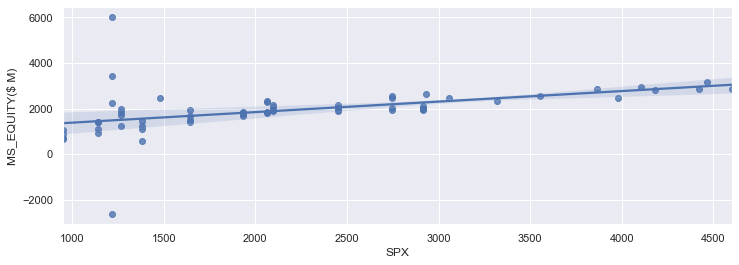

In [259]:
plt.rcParams["figure.figsize"] = [12,4]
sns.regplot(x=MS_data['SPX'], y=MS_data['MS_EQUITY($ M)'], data=MS_data);

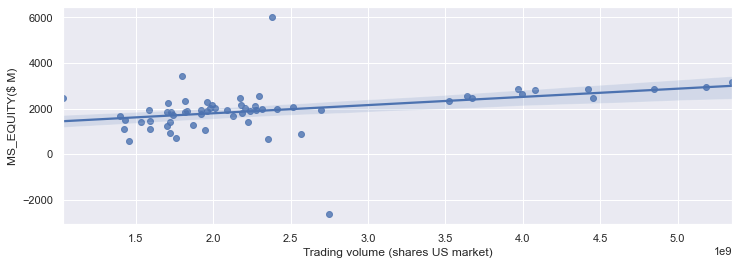

In [260]:
plt.rcParams["figure.figsize"] = [12,4]
sns.regplot(x=MS_data['Trading volume (shares US market)'], y=MS_data['MS_EQUITY($ M)'], data=MS_data);

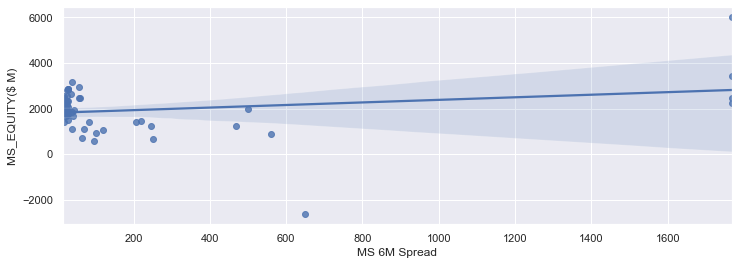

In [261]:
plt.rcParams["figure.figsize"] = [12,4]
sns.regplot(x=MS_data['MS 6M Spread'], y=MS_data['MS_EQUITY($ M)'], data=MS_data);

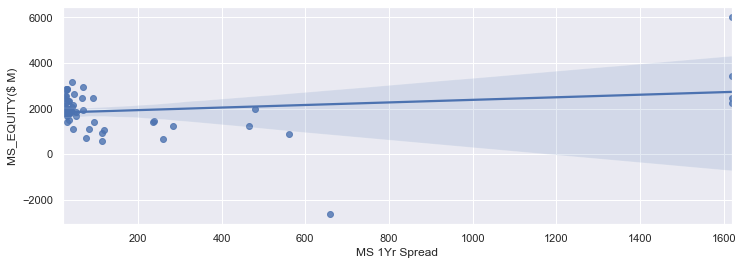

In [262]:
plt.rcParams["figure.figsize"] = [12,4]
sns.regplot(x=MS_data['MS 1Yr Spread'], y=MS_data['MS_EQUITY($ M)'], data=MS_data);

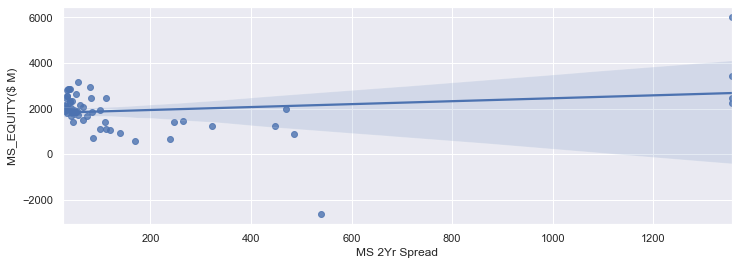

In [263]:
plt.rcParams["figure.figsize"] = [12,4]
sns.regplot(x=MS_data['MS 2Yr Spread'], y=MS_data['MS_EQUITY($ M)'], data=MS_data);

In [264]:
X = sm.add_constant(MS_data[['SPX', 'Trading volume (shares US market)','MS 1Yr Spread']])
y = MS_data['MS_EQUITY($ M)']

In [265]:
mod_OLS_1Y = sm.OLS(y,X)
result_OLS_1Y = mod_OLS_1Y.fit()
result_OLS_1Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     13.14
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.32e-06
Time:                        16:16:31   Log-Likelihood:                -483.93
No. Observations:                  60   AIC:                             975.9
Df Residuals:                      56   BIC:                             984.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               422.8624    297.398      1.422      0.161    -172.897    1018.622
SPX                                   0.8419      0.194      4.348      0.000       0.454       1.230
Trading volume (shares US market) -2.412e-07   1.85e-07     -1.305      0.197   -6.11e-07    1.29e-07
MS 1Yr Spread                         1.2284      0.281      4.365      0.000       0.665       1.792
==============================================================================
Omnibus:                       50.081   Durbin-Watson:                   2.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.341
Skew:                          -1.656   Prob(JB):                    7.14e-169
Kurtosis:                      20.285   Cond. No.                     7.46e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
X = sm.add_constant(MS_data[['SPX', 'Trading volume (shares US market)','MS 2Yr Spread']])
y = MS_data['MS_EQUITY($ M)']

In [267]:
mod_OLS_2Y = sm.OLS(y,X)
result_OLS_2Y = mod_OLS_2Y.fit()
result_OLS_2Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     13.35
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.10e-06
Time:                        16:16:37   Log-Likelihood:                -483.73
No. Observations:                  60   AIC:                             975.5
Df Residuals:                      56   BIC:                             983.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               349.8918    303.098      1.154      0.253    -257.286     957.070
SPX                                   0.8651      0.195      4.441      0.000       0.475       1.255
Trading volume (shares US market)   -2.5e-07   1.84e-07     -1.355      0.181    -6.2e-07     1.2e-07
MS 2Yr Spread                         1.5158      0.343      4.421      0.000       0.829       2.203
==============================================================================
Omnibus:                       48.093   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              720.056
Skew:                          -1.560   Prob(JB):                    4.38e-157
Kurtosis:                      19.682   Cond. No.                     7.63e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hetroscedasticity - Test

In [268]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(result_OLS_6M.resid, result_OLS_6M.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 12.50554436463134),
 ('p-value', 0.005837585325781763),
 ('f-value', 4.91503323949979),
 ('f p-value', 0.004218146666469097)]

In [269]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(result_OLS_1Y.resid, result_OLS_1Y.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 12.790948582733538),
 ('p-value', 0.0051112090277717894),
 ('f-value', 5.057597354244501),
 ('f p-value', 0.003597889822700616)]

In [270]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(result_OLS_2Y.resid, result_OLS_2Y.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 12.398243992512015),
 ('p-value', 0.0061363146948482305),
 ('f-value', 4.86187710856336),
 ('f p-value', 0.004476670349517507)]

## Multicollinearity Test

In [271]:
vif_data= MS_data[['SPX', 'Trading volume (shares US market)', 'MS 6M Spread',
       'MS 1Yr Spread', 'MS 2Yr Spread']]

In [272]:

vif = pd.DataFrame()

vif["features"] = vif_data.columns
vif["VIF"] = [variance_inflation_factor(vif_data.values,i) for i in range(len(vif_data.columns))]
vif

,features,VIF
0,SPX,22.724914
1,Trading volume (shares US market),27.527045
2,MS 6M Spread,1666.600115
3,MS 1Yr Spread,3378.203318
4,MS 2Yr Spread,506.511639


In [273]:
vif_data_6M = MS_data[['SPX', 'Trading volume (shares US market)', 'MS 6M Spread']]
vif_6M = pd.DataFrame()

vif_6M["features"] = vif_data_6M.columns
vif_6M["VIF"] = [variance_inflation_factor(vif_data_6M.values,i) for i in range(len(vif_data_6M.columns))]
vif_6M

,features,VIF
0,SPX,18.689644
1,Trading volume (shares US market),19.565148
2,MS 6M Spread,1.213911


In [274]:
vif_data_1Y = MS_data[['SPX', 'Trading volume (shares US market)', 'MS 1Yr Spread']]
vif_1Y = pd.DataFrame()

vif_1Y["features"] = vif_data_1Y.columns
vif_1Y["VIF"] = [variance_inflation_factor(vif_data_1Y.values,i) for i in range(len(vif_data_1Y.columns))]
vif_1Y

,features,VIF
0,SPX,18.859178
1,Trading volume (shares US market),19.884584
2,MS 1Yr Spread,1.249216


In [275]:
vif_data_2Y = MS_data[['SPX', 'Trading volume (shares US market)', 'MS 2Yr Spread']]
vif_2Y = pd.DataFrame()

vif_2Y["features"] = vif_data_2Y.columns
vif_2Y["VIF"] = [variance_inflation_factor(vif_data_2Y.values,i) for i in range(len(vif_data_2Y.columns))]
vif_2Y

,features,VIF
0,SPX,18.955225
1,Trading volume (shares US market),20.205750
2,MS 2Yr Spread,1.302842


In [276]:
len(vif_data.columns)

5

## ARDL

In [277]:
MS_ardl  = ARDL(endog=MS_data['MS_EQUITY($ M)'],lags=1,exog = MS_data[['SPX', 'Trading volume (shares US market)','MS 6M Spread']],order=2).fit()

In [278]:
MS_data.columns

Index(['MS_EQUITY($ M)', 'SPX', 'Trading volume (shares US market)',
       'MS 6M Spread', 'MS 1Yr Spread', 'MS 2Yr Spread'],
      dtype='object')

In [279]:
MS_ardl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   No. Observations:                   60
Model:               ARDL(1, 2, 2, 2)   Log Likelihood                -447.775
Method:               Conditional MLE   S.D. of innovations            478.408
Date:                Thu, 15 Dec 2022   AIC                            919.550
Time:                        16:16:42   BIC                            944.480
Sample:                             2   HQIC                           929.281
                                   60                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  895.9262    241.827      3.705      0.001     409.700    1382.153
MS_EQUITY($ M).L1                       -0.3663      0.156     -2.347      0.023      -0.680      -0.052
SPX.L0                                   0.6731      0.546      1.232      0.224      -0.425       1.771
SPX.L1                                   0.7240      0.846      0.856      0.396      -0.977       2.425
SPX.L2                                  -0.5936      0.560     -1.060      0.294      -1.720       0.532
Trading volume (shares US market).L0  2.881e-08      2e-07      0.144      0.886   -3.72e-07     4.3e-07
Trading volume (shares US market).L1  -2.19e-07   2.36e-07     -0.928      0.358   -6.93e-07    2.56e-07
Trading volume (shares US market).L2  9.297e-08   1.98e-07      0.469      0.641   -3.05e-07    4.91e-07
MS 6M Spread.L0                          4.1030      0.580      7.070      0.000       2.936       5.270
MS 6M Spread.L1                         -0.8351      1.136     -0.735      0.466      -3.119       1.449
MS 6M Spread.L2                         -1.5298      0.694     -2.205      0.032      -2.925      -0.135
========================================================================================================
"""

In [280]:
MS__VIX_data = pd.read_excel('MS_Data Analyses_analysis_1213.xlsx',sheet_name='VIX')
MS__VIX_data.head()

,Date,MS_EQUITY($ M),VIX,Trading volume (shares US market),MS 6M Spread
0,Q4 2007,2472,22.500000,1027273155,1769.31
1,Q1 2008,3414,25.610001,1797537680,1769.31
2,Q2 2008,2228,23.950001,1708720980,1769.31
3,Q3 2008,6031,39.389999,2382291883,1769.31
4,Q4 2008,-2648,40.000000,2748365910,650.00


In [281]:
date = pd.date_range(start = '2007-12-01',end= '2022-12-01',freq = 'Q')
date = date.to_period('Y')
date

PeriodIndex(['2007', '2008', '2008', '2008', '2008', '2009', '2009', '2009',
             '2009', '2010', '2010', '2010', '2010', '2011', '2011', '2011',
             '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013',
             '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015',
             '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017',
             '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019',
             '2019', '2020', '2020', '2020', '2020', '2021', '2021', '2021',
             '2021', '2022', '2022', '2022'],
            dtype='period[A-DEC]', freq='A-DEC')

In [282]:
MS__VIX_data['index'] = MS__VIX_data['Date']
MS__VIX_data.set_index("index",inplace =True)
MS__VIX_data.drop(columns="Date", inplace = True)
MS__VIX_data

,MS_EQUITY($ M),VIX,Trading volume (shares US market),MS 6M Spread
index,,,,
Q4 2007,2472,22.500000,1027273155,1769.310
Q1 2008,3414,25.610001,1797537680,1769.310
Q2 2008,2228,23.950001,1708720980,1769.310
Q3 2008,6031,39.389999,2382291883,1769.310
Q4 2008,-2648,40.000000,2748365910,650.000
Q1 2009,877,44.139999,2566610951,560.000
Q2 2009,681,26.350000,2356718805,249.650
Q3 2009,1073,25.610001,1945008918,119.960
Q4 2009,722,21.680000,1761707009,64.020


In [283]:
ADF(MS__VIX_data['VIX'],'VIX')

The Augmented Dickey Fuller Test: VIX
ADF test Statistic          -4.557710
p-value                      0.000154
lags used                    0.000000
observations                59.000000
the critical value (1%)     -3.546395
the critical value (5%)     -2.911939
the critical value (10%)    -2.593652
Reject the null hypothesis
The VIX series is stationary


In [295]:
MS__VIX_data.columns

Index(['MS_EQUITY($ M)', 'VIX', 'Trading volume (shares US market)',
       'MS 6M Spread'],
      dtype='object')

In [287]:
MS__VIX_data.columns

Index(['MS_EQUITY($ M)', 'VIX', 'Trading volume (shares US market)',
       'MS 6M Spread'],
      dtype='object')

In [296]:
X = sm.add_constant(MS__VIX_data[['VIX','Trading volume (shares US market)','MS 6M Spread']])
y = MS__VIX_data['MS_EQUITY($ M)']


In [297]:
mod_OLS_VIX = sm.OLS(y,X)
result_OLS_VIX = mod_OLS_VIX.fit()
result_OLS_VIX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     9.098
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           5.32e-05
Time:                        16:22:18   Log-Likelihood:                -488.00
No. Observations:                  60   AIC:                             984.0
Df Residuals:                      56   BIC:                             992.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              1208.1622    337.676      3.578      0.001     531.715    1884.610
VIX                                 -43.1343     14.917     -2.892      0.005     -73.016     -13.253
Trading volume (shares US market)   5.85e-07   1.27e-07      4.623      0.000    3.32e-07    8.39e-07
MS 6M Spread                          1.1361      0.289      3.933      0.000       0.557       1.715
==============================================================================
Omnibus:                       49.585   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              609.195
Skew:                          -1.742   Prob(JB):                    5.19e-133
Kurtosis:                      18.216   Cond. No.                     7.92e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
vif_data_VIX = MS__VIX_data[[ 'VIX', 'Trading volume (shares US market)','MS 6M Spread']]
vif_VIX  = pd.DataFrame()



In [306]:
vif_VIX["features"] = vif_data_VIX.columns
vif_VIX["VIF"] = [variance_inflation_factor(vif_data_VIX.values,i) for i in range(len(vif_data_VIX.columns))]
vif_VIX

,features,VIF
0,VIX,7.622270
1,Trading volume (shares US market),6.238411
2,MS 6M Spread,1.603757


In [309]:
residual_VIX = result_OLS_VIX.resid
residual_VIX.head()

index
Q4 2007    -376.793205
Q1 2008     248.715996
Q2 2008    -956.925236
Q3 2008    3117.999345
Q4 2008   -4477.185128
dtype: float64

In [310]:
ADF(residual_VIX,'residual_VIX')

The Augmented Dickey Fuller Test: residual_VIX
ADF test Statistic          -2.090616
p-value                      0.248305
lags used                   11.000000
observations                48.000000
the critical value (1%)     -3.574589
the critical value (5%)     -2.923954
the critical value (10%)    -2.600039
Accept the null hypothesis
The residual_VIX series is non-stationary 


In [311]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
test_result = sms.het_breuschpagan(result_OLS_VIX.resid, result_OLS_VIX.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 13.083542648530536),
 ('p-value', 0.0044593790111628565),
 ('f-value', 5.205553514188923),
 ('f p-value', 0.0030527296708987737)]

In [313]:
MS_ardl_VIC  = ARDL(endog=MS__VIX_data['MS_EQUITY($ M)'],lags=2,exog =MS__VIX_data[['VIX', 'Trading volume (shares US market)','MS 6M Spread']],order=1).fit()
MS_ardl_VIC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:         MS_EQUITY($ M)   No. Observations:                   60
Model:               ARDL(2, 1, 1, 1)   Log Likelihood                -446.362
Method:               Conditional MLE   S.D. of innovations            532.170
Date:                Thu, 15 Dec 2022   AIC                            912.724
Time:                        16:38:06   BIC                            933.329
Sample:                             2   HQIC                           920.750
                                   60                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 1438.1971    323.515      4.446      0.000     788.069    2088.325
MS_EQUITY($ M).L1                       -0.0207      0.104     -0.198      0.844      -0.230       0.189
MS_EQUITY($ M).L2                        0.0354      0.092      0.383      0.704      -0.150       0.221
VIX.L0                                 -35.0218     12.414     -2.821      0.007     -59.968     -10.075
VIX.L1                                 -13.2573     13.135     -1.009      0.318     -39.653      13.138
Trading volume (shares US market).L0  6.568e-07   2.33e-07      2.822      0.007    1.89e-07    1.12e-06
Trading volume (shares US market).L1 -1.084e-07   2.34e-07     -0.463      0.646   -5.79e-07    3.63e-07
MS 6M Spread.L0                          4.8028      0.604      7.949      0.000       3.589       6.017
MS 6M Spread.L1                         -3.4274      0.581     -5.901      0.000      -4.595      -2.260
========================================================================================================
"""